# NUMPY

In [76]:
import numpy as np

In [15]:
#Creating Vectors

a = np.array([1,2,0])
b = np.array([-3,1.5,1])

print(a,b)

[1 2 0] [-3.   1.5  1. ]


In [8]:
# For a matrix, each nested list is a row, and each index for nested list is a column element. 

C = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [1, 0, 1]
])

C

array([[1, 0, 0],
       [0, 2, 0],
       [1, 0, 1]])

In [13]:
# Matrix vec product

C @ a

# @ is a wrapper for np.dot(C,a) method! (ampersand)

if np.shape(C @ a) == np.shape(np.dot(C,a)):
    print("YEE")

    # np.dot?

# The @ really is just an inner product!!!

#forms of dot method

a.dot(b)
np.dot(a,b)
a @ b

YEE


Call signature:  np.dot(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function dot>
Docstring:      
dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to
  :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
  preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of
  `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

It uses an optimized BLAS library when possible (see `numpy.linalg`).

Parameters
----------
a : array_like
    Fi

In [20]:
# Cross product calculator

np.cross(a,b)

array([ 2. , -1. ,  7.5])

In [42]:
# linalg is a submodule of numpy, replies on BLAS and LAPACK 
# Here, we use it so solve linear eqn Cx = a, solves for x

x = np.linalg.solve(C, a) # ----> FASTER! 

x_inverse = np.linalg.inv(C) @ a
print(x)
print(x_inverse)

# nb shape[0] is column index (i.e. M)
#    shape[1] is row index (i.e. N)

assert 

[ 1.  1. -1.]
[ 1.  1. -1.]
Object `assert` not found.


# PYTHON IN-BUILT OPTIMISATION

In [29]:

def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]  # here, assert tests if this line is true. if not, error. Here, making sure row of matrix
                                         # equal to vector column dimension
    result = []
    for r in range(matrix.shape[0]):    
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(matrix @ vector)


[0.5206426  0.73687632 0.74971394]
[0.5206426  0.73687632 0.74971394]


In [43]:
# Optimisation 


def fast_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        #value = 0
        value = np.sum(matrix[r]*vector)

       # got rid of nested loop
       # for c in range(matrix.shape[1]):
       # value += matrix[r, c] * vector[c]
       
        result.append(value)
    return np.array(result)


# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(fast_matvec(matrix, vector))
print(matrix @ vector)

[0.62912604 0.34003024 0.71963908]
[0.62912604 0.34003024 0.71963908]


In [61]:
def add(a,b):
    return a + b 

assert add(1,1) == 2
assert add(4,5) == 9

# assert stops code from exe if line is not True! 
# Floats aren't exact, and so assert error can be tripped by float operations

# isclose() says that if a number is within a defined tolerance then we accept the calc.FOR SCALARS

assert np.isclose(100/3*30, 1000.0, rtol=1e-20)

# allclose() does same as isclose() for arrays

assert np.allclose(C, C+1e-1,rtol=1e-1)

In [54]:
import numpy.testing as npt 

A = np.ones(shape=(4,4), dtype=np.float64)
B = np.ones(shape=(4,4), dtype=np.float64)
B[2,2] = 4

In [60]:
npt.assert_almost_equal(A,A + 1e-1)

#numpy.testing allows you to have an assert within a method, and also gives LOTS OF INFO for diagnosis

In [57]:
npt.assert_almost_equal(matrix @ vector, fast_matvec(matrix,vector))

# TIMING FUNCTIONS

In [65]:
#TIMING A FUNCTION

from timeit import timeit
import time

def f():
    # contents of function here
    time.sleep(0.01)
    return 1+2

t = timeit(f, number=1000)
print(t/1000)

0.010540206699981354


In [68]:
t = %timeit -o f() #handles the loop timing for you! % is magic commmand



10.5 ms ± 40.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[0.010514796000206843,
 0.010536240999936126,
 0.010469230000162498,
 0.010507640999858268,
 0.010480087000178172,
 0.010599699000013061,
 0.010538125999737531]

In [79]:
matrix_size = [2,10,100]

slow_times = []
fast_times = []

for n in matrix_size:
    test_mat = np.random.rand(n,n)
    test_vec = np.random.rand(n)

t_slow = %timeit -o slow_matvec(test_mat,test_vec)  # using our previous matvec calculator function 
t_fast = %timeit -o fast_matvec(test_mat,test_vec)

slow_times.append(t_slow.average)
fast_times.append(t_fast.average)

print(f"[Slow] [N={n}] Average Run time: {t_slow.average}")
print(f"[Fast] [N={n}] Average Run Time: {t_fast.average}")

2.08 ms ± 25.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
301 μs ± 2.97 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[Slow] [N=100] Average Run time: 0.0020763018570973406
[Fast] [N=100] Average Run Time: 0.0003008643428661994


# PLOTTING w/ MATPLOTLIB

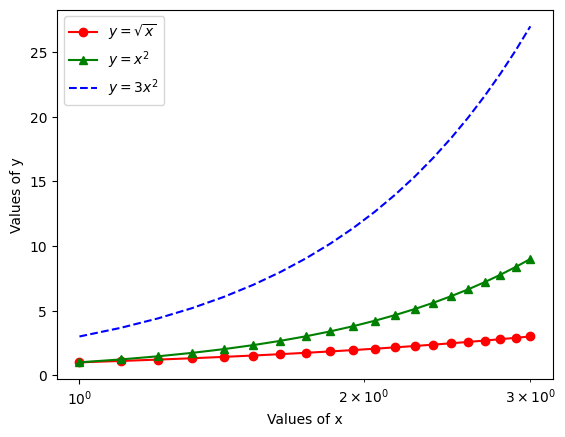

In [77]:
import matplotlib.pylab as plt
import numpy as np

import matplotlib.pylab as plt
import numpy as np

x = np.linspace(1, 3, 20)
y0 = x
y1 = x ** 2
y2 = 3 * x ** 2

plt.plot(x, y0, "ro-", label=r"$y=\sqrt{x}$") # r in front of string tells it to ignore \ etc.
plt.plot(x, y1, "g^-", label="$y=x^2$")
plt.plot(x, y2, "b--", label="$y=3x^2$")

plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.xscale("log")

plt.legend() # creates a legend, can define labels in here but keep to doing it in .plot!

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

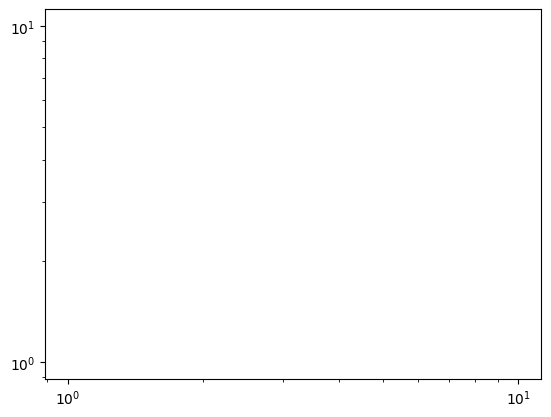

In [81]:
plt.loglog(matrix_size, slow_times)
plt.loglog(matrix_size, fast_times)

plt.xlabel("Matrix sizes")
plt.ylabel("Time per call (s)")
plt.title("Matrix vector scaling")
plt.savefig("myplot.pdf")

In [ ]:
data = np.random.rand(10, 10)

# np.save("my_results.npy", data) saves data to a file so you can use it again, continue using it or resume calculations.